# Driftscan Demo
Demonstration of Driftscan measurements with DVS.

                                                              As on 27/06/2024

In [1]:
%pylab inline
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from dvs import driftscan, cbid2url

# Note: the flux models used for the SEFD scale are in the following file:
print(driftscan.models.catalogue_file)
!cat {driftscan.models.catalogue_file}

/home/aph/work/dvs/libraries/systemsanalysis/katsemodels.py:1143: RuntimeWarning: divide by zero encountered in divide
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.
/home/aph/work/dvs/libraries/systemsanalysis/katsemodels.py:1143: RuntimeWarning: invalid value encountered in multiply
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.


INFO: Orion A (thermal) flux model fitted coefficients: [ 398.80529653 -437.57217069]
INFO: Orion A (power law) flux model fitted coefficients: [-0.84961654  1.87011783 -0.24937387]
../catalogues/fluxmodels.csv
# ID | Name(s)                                , tag  ,   RA(J2000),  Dec(J2000), katpoint flux polynomial, katsemodel flux polynomial, linpol(frac), pol angle(deg), mean width(arcmin), shape   , Key for model       , Comments
# 
# Targets with flux models, specifically as used for DVS "single dish" tests i.e. may be resolved on long baselines.

# Taurus A: Polarisation from Vinyaikin 2007, linpol agrees with Baars 1973 at <10GHz and angle agrees with Baars 1973 at >=3GHz;Width is Perley & Butler 2017's LAS/3 to be half power width for a Gaussian
# The best data for temporal scaling [Macias-Perez et al 2010] is -0.18% at ~1 GHz (WMAP 7yr suggests 0.22% at >30 GHz)
J0534+2200 | Taurus A | 3C 144 | PKS 0531+21  , radec, 05:34:31.97, +22:00:52.1, , (3.915 -0.299 0 Y0=1977 inc=-0.001

## Drift Scans Datasets

In [3]:
# The default folder is dvs/models/receiver-models, which gets populated as part of DVS work.
# However, for receivers where we already have engineering data available, use the following:
driftscan.models.lab_Trec_dir = "/home/aph/work/katconfig/user/receiver-models/mkat"

Name: 1718607657_sdp_l0 (version 4.0)
-------------------------------------------------------------------------------
URL: http://archive-gw-1.kat.ac.za/1718607657/1718607657_sdp_l0.full.rdb
Observer: Mattieu  Experiment ID: 20240617-0018
Description: '5: Drift scan 2'
Observed from 2024-06-17 09:01:03.287 SAST to 2024-06-17 09:43:27.393 SAST
Dump rate / period: 0.49998 Hz / 2.000 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m000,m001,m002,m003,m004,m005,m006,m007,m008,m009,m010,m011,m012,m013,m014,m015,m016,m017,m018,m019,m020,m021,m022,m023,m024,m025,m026,m027,m028,m029,m030,m031,m032,m033,m034,m035,m036,m037,m038,m039,m040,m041,m042,m043,m045,m046,m048,m049,m050,m051,m053,m054,m055,m056,m057,m058,m060,m061,m063  118      7080
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 S    c875M1k    3062.500         875.000           1024       854.492
--------------------------------------------------

Name: 1719214722_sdp_l0 (version 4.0)
-------------------------------------------------------------------------------
URL: http://archive-gw-1.kat.ac.za/1719214722/1719214722_sdp_l0.full.rdb
Observer: Mattieu  Experiment ID: 20240624-0006
Description: '4: Drift scan 2'
Observed from 2024-06-24 09:38:44.728 SAST to 2024-06-24 10:31:32.329 SAST
Dump rate / period: 0.99981 Hz / 1.000 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m000,m001,m002,m003,m004,m005,m006,m007,m008,m009,m010,m011,m012,m013,m014,m015,m016,m017,m018,m019,m020,m021,m022,m023,m024,m025,m026,m027,m028,m029,m030,m031,m032,m033,m034,m035,m036,m037,m038,m039,m040,m041,m043,m044,m045,m046,m047,m048,m049,m050,m051,m052,m053,m054,m055,m056,m057,m058,m059,m060,m062,m063  124      7812
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    c856M1k    1284.000         856.000           1024       835.938
-----------------------------------

/home/aph/venv-py3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/aph/work_dvs/dvs/dvs/driftscan.py:219: RuntimeWarning: All-NaN slice encountered
  ax[1][p].plot(chans, 10*np.log10(np.nanmax(vis[:,:,p], axis=0)))


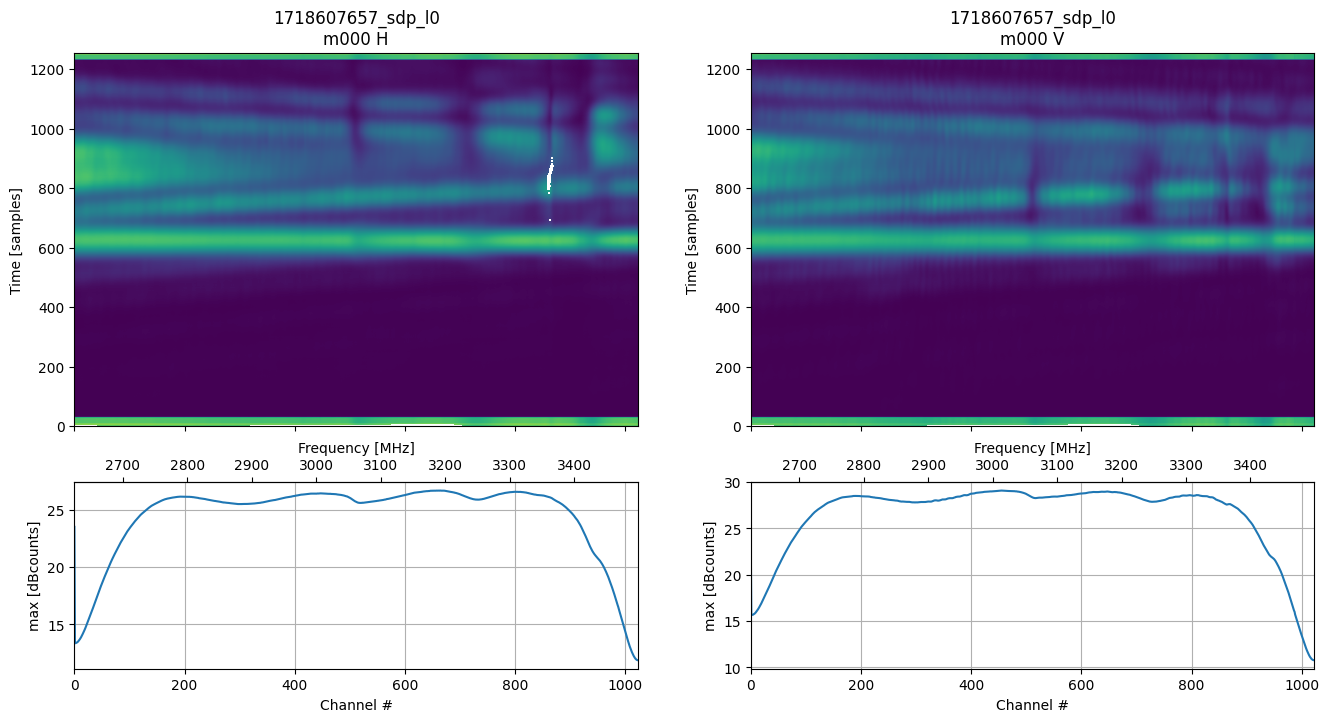

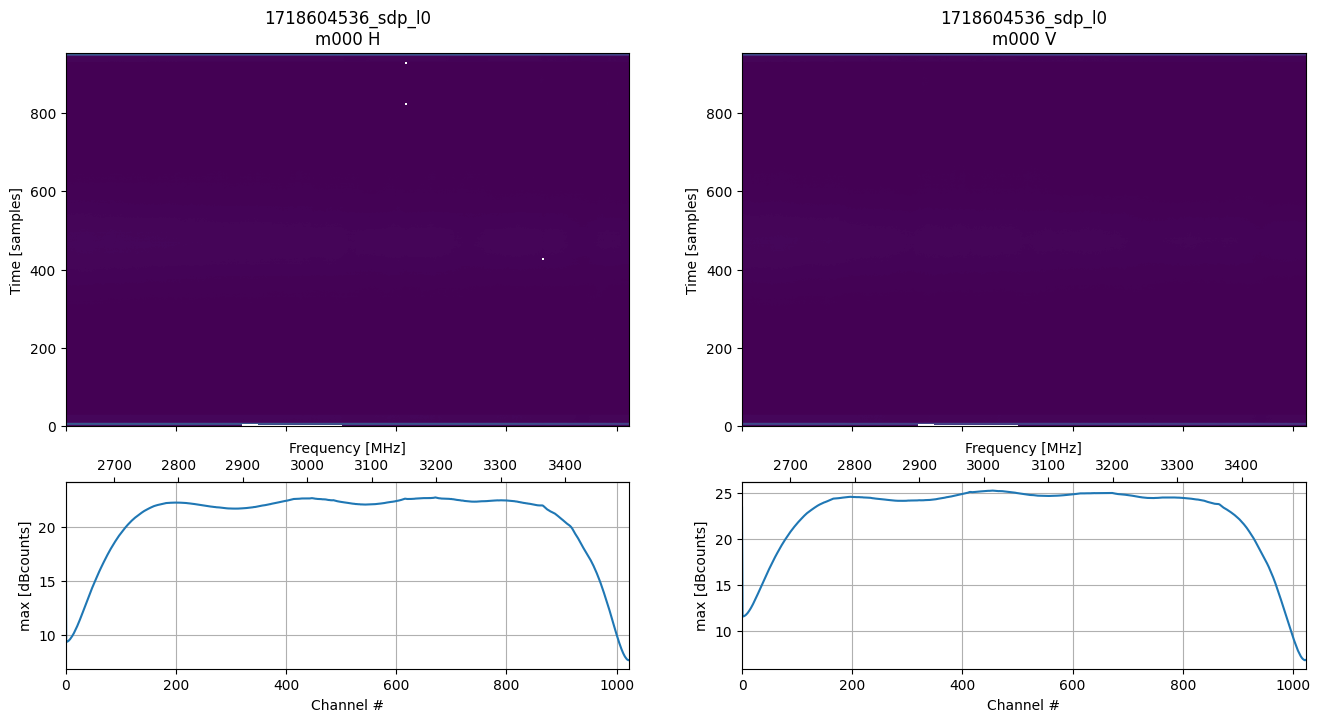

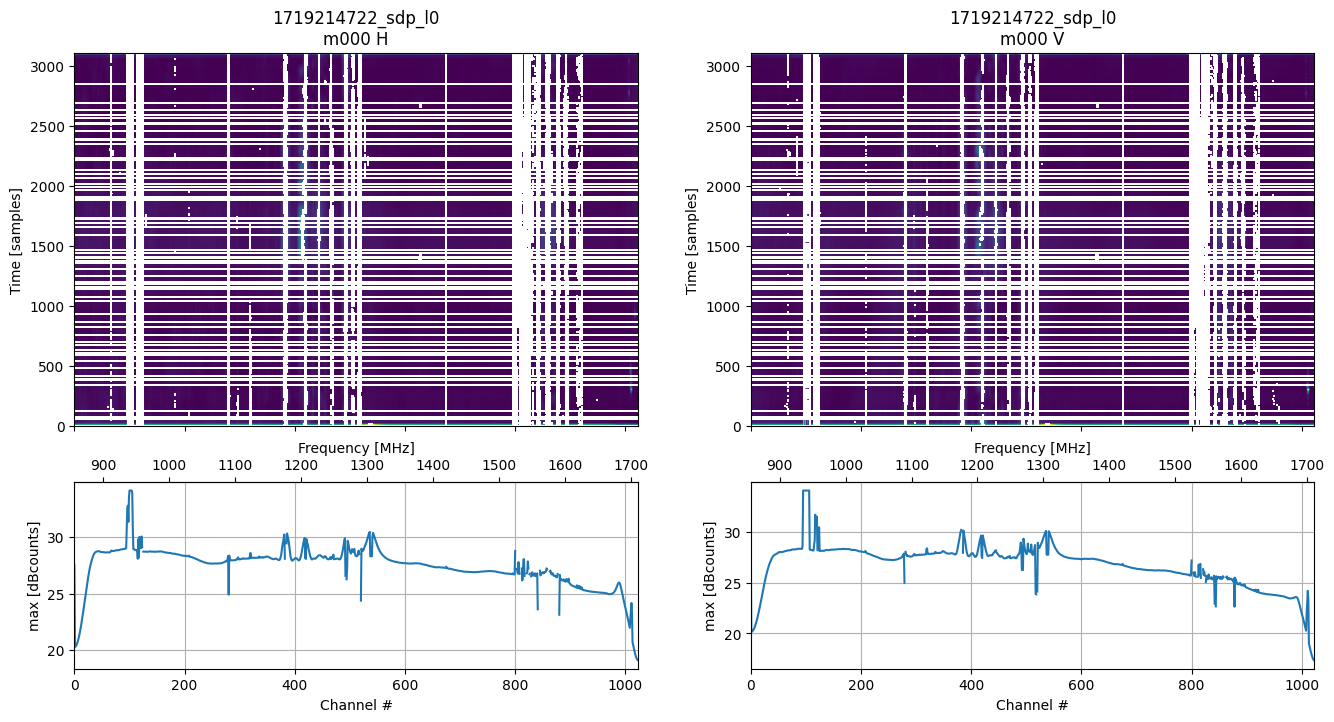

In [5]:
cbids = [1718607657, # Taurus A, S4 band. 8 degrees from Sun - Too close to fit reliable background!
         1718604536, # PKS0408-65, S4 band. Low SNR, but works.
         1719214722, # PKS0408-65, L band. Low SNR and LOTS of data lost - even with flagging not worth using.
        ]
# These were all recorded during workdays when construction was happening in the MeerKAT core,
# S-band should be fine, but be prepared to discard single dish data from antennas < m040 in UHF & L-band.

for cbid in cbids:
    driftscan.load_vis(cbid2url(cbid), ant=0, debug=True)

### First example - straight forward

Drift scan 1718604536_sdp_l0 on m000 with receiver s.66.

Source:	 J0408-6545
INFO: defaulting to the first of the following flux models: SARAO
	 Gaussian-shaped extent 0.0 arcmin; flux model as per [SARAO].
INFO: Fitting transit & beam widths from the data itself.


/home/aph/venv-py3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


INFO: Fitting channel 0 of 63
INFO: Fitting channel 10 of 63
INFO: Fitting channel 20 of 63
INFO: Fitting channel 30 of 63
INFO: Fitting channel 40 of 63
INFO: Fitting channel 50 of 63
INFO: Fitting channel 60 of 63
Fitting HPBW over 2681 - 3438 MHz assuming D=13.50 m
Simultaneous fit to 2 products: 1.34925 lambda^1 / 13.5
Simultaneous fit to 2 products: 1.35793 lambda^(1.00278) / 13.5
Transit found at relative time sample 468; averaging 2 time samples at each datum.


/home/aph/venv-py3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


UTC for bore sight transit of target: 2024-06-17 06:25:04.196
    Antenna pointing to RA 4.139 hrs, DEC -65.753 deg
    Target Az,El: [157.5372477   47.97366754] deg
    Antenna Az,El: [157.55158578  47.98470217] deg
    Source within [0.01433808 0.01103463] deg of beam bore sight (<0.028 HPBW)
    Distance from target to the Sun 91 deg
    Distance from target to the Moon 98 deg
Scaling source flux for pointing offset, by 0.999 - 0.998 over frequency range

Now determining measured and predicted SEFD with target in beam nulls:
    ['k0'] before transit & ['K0'] after transit

Deriving measured SEFD
Scaling source flux for beam coupling, atmosphere at elevation 48 deg above horizon, and year 2024.46
Scale factor between 0.9925 and 0.9927
Scaling source flux for beam coupling, atmosphere at elevation 48 deg above horizon, and year 2024.46
Scale factor between 0.9925 and 0.9927

Predicting SEFD at null k0
UTC for specified interval: 2024-06-17 06:18:02.178
    Distance from bore sight to

/home/aph/work_dvs/dvs/dvs/driftscan.py:76: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_axis,vis,style,**plotargs)


Report generated <bruce.science.kat.ac.za:/home/aph/work/dvs/notebooks/1718604536_sdp_l0_m000_driftscan.pdf>


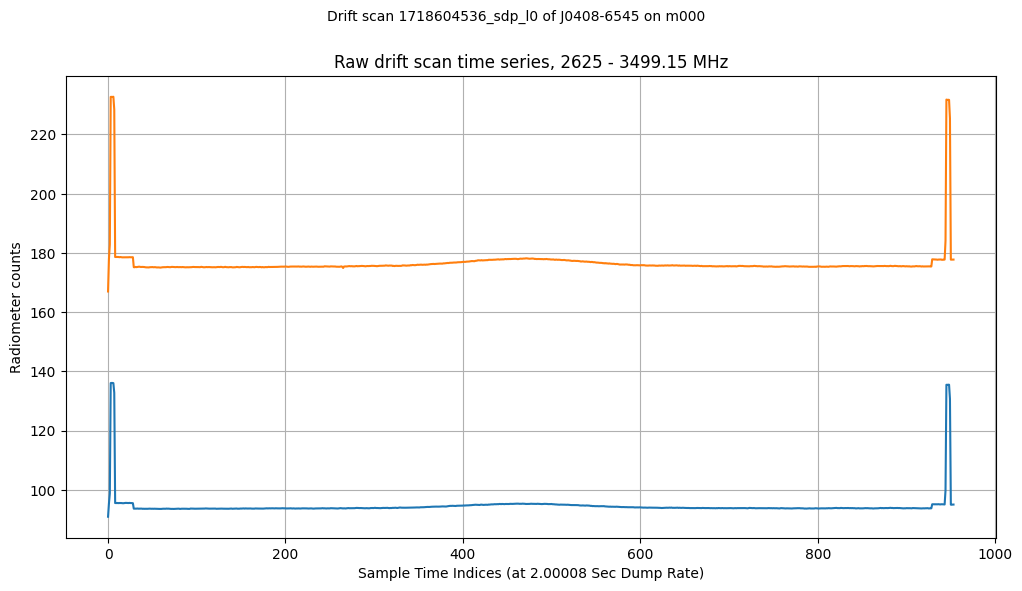

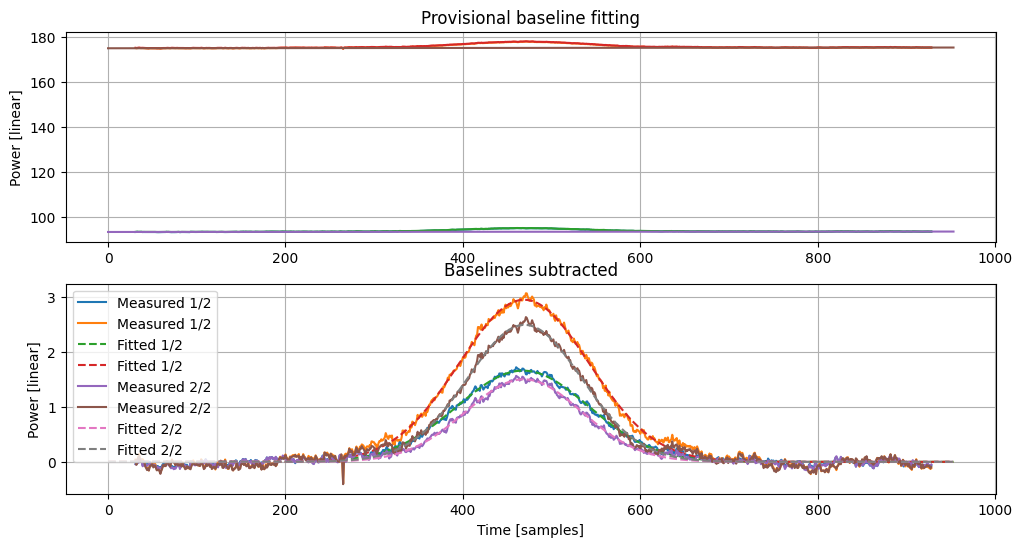

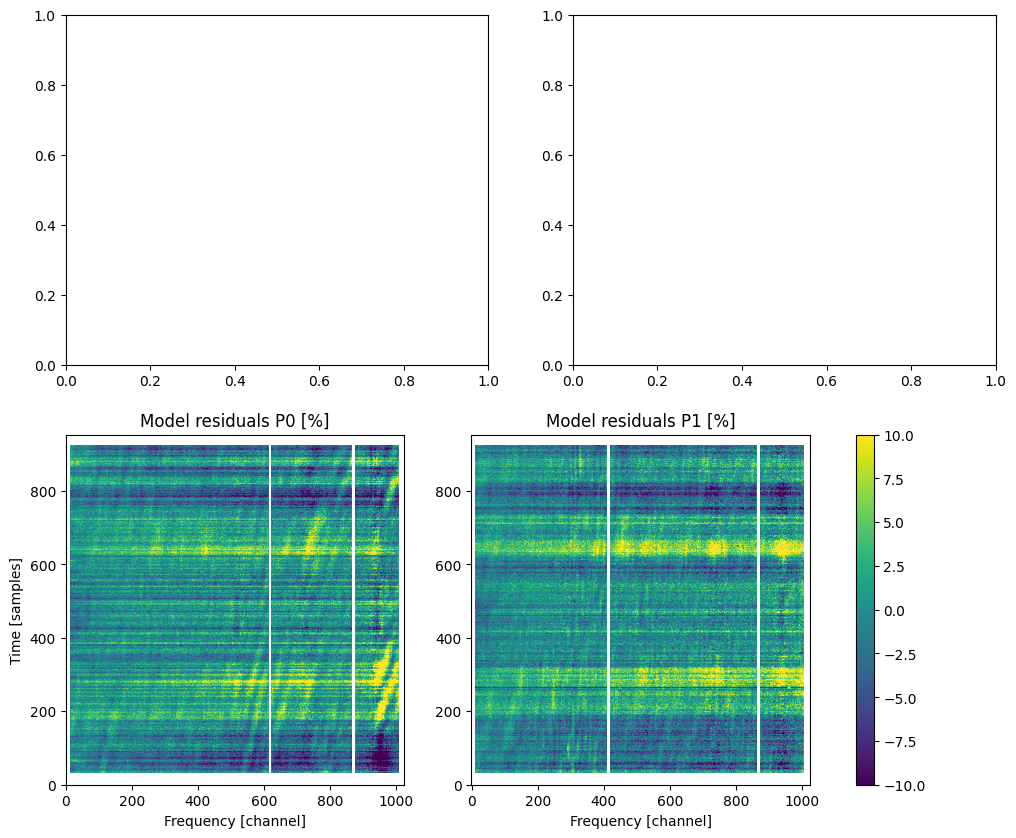

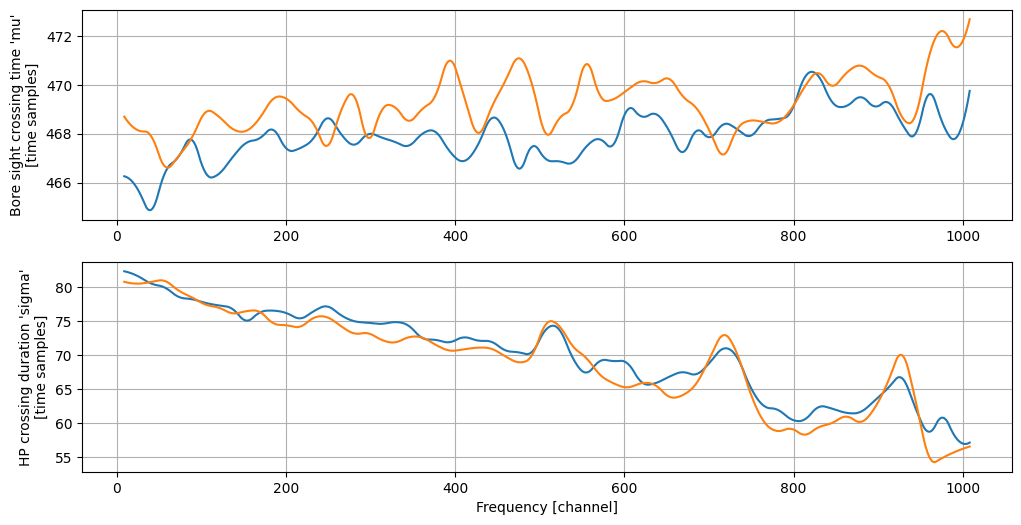

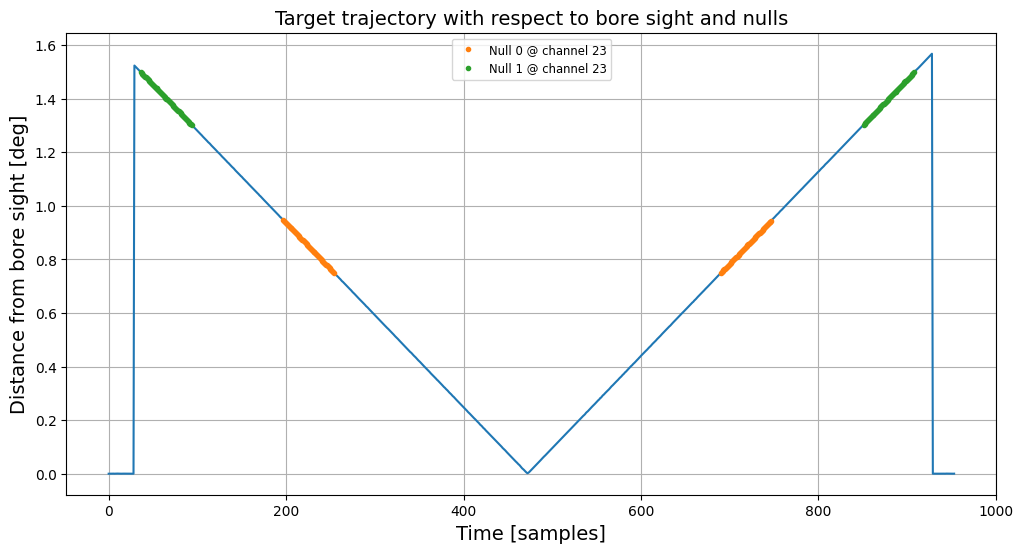

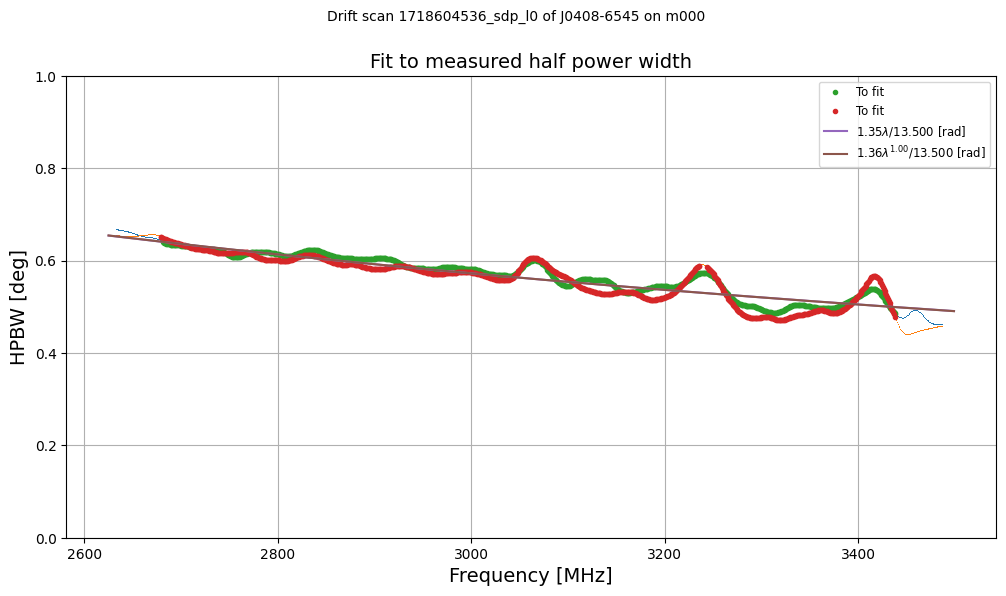

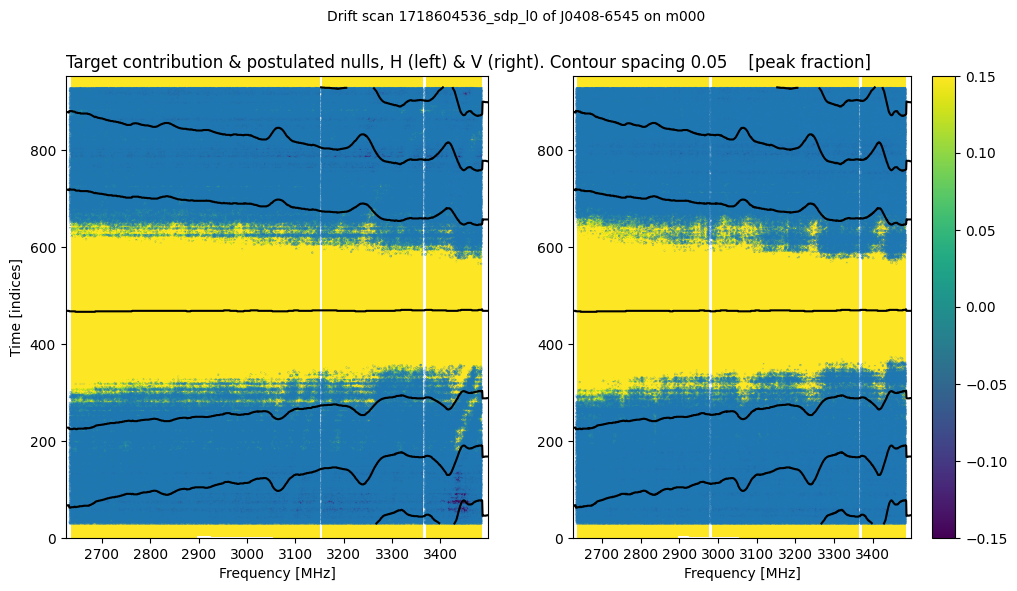

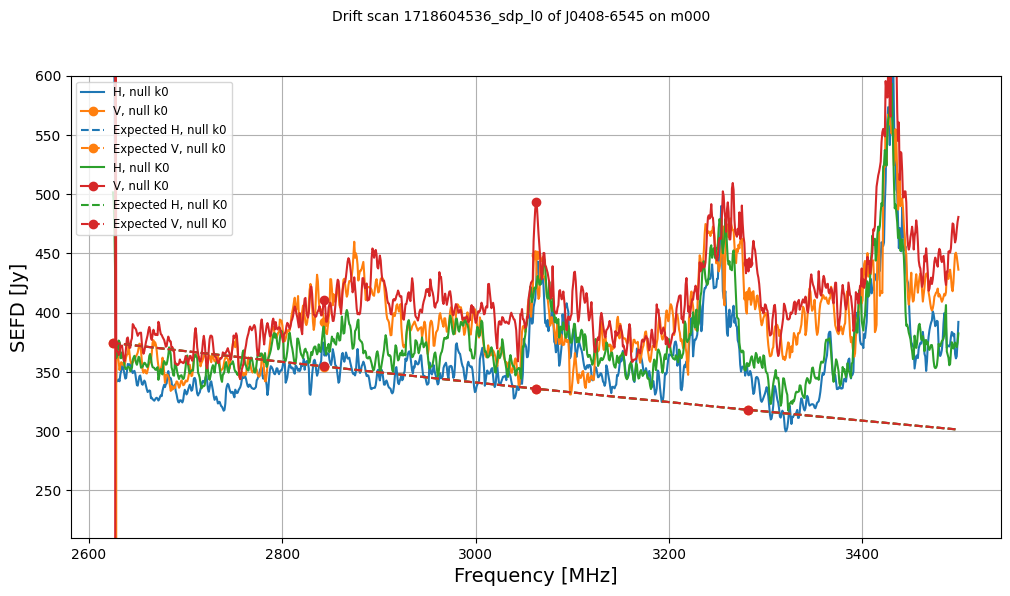

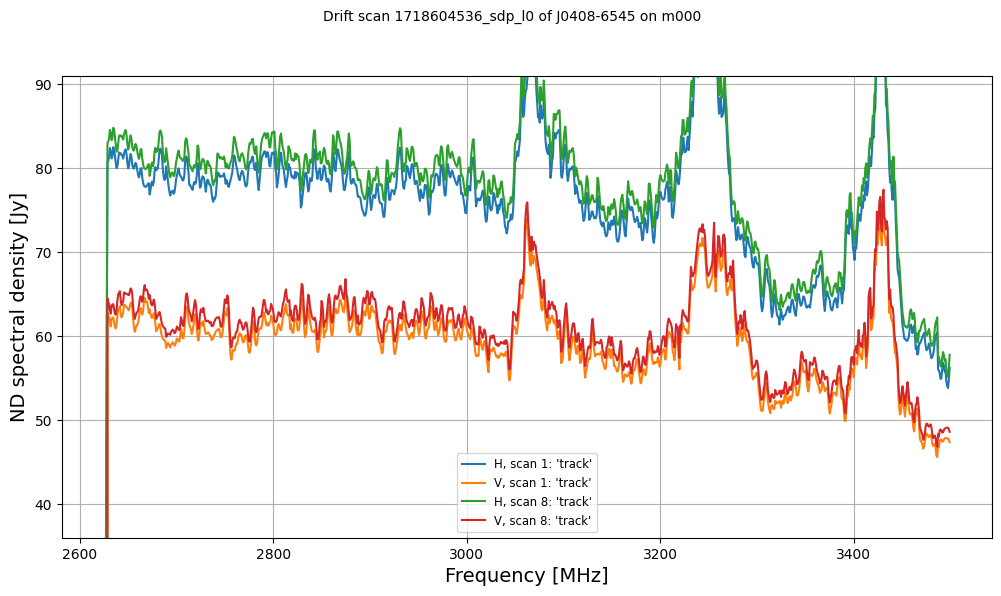

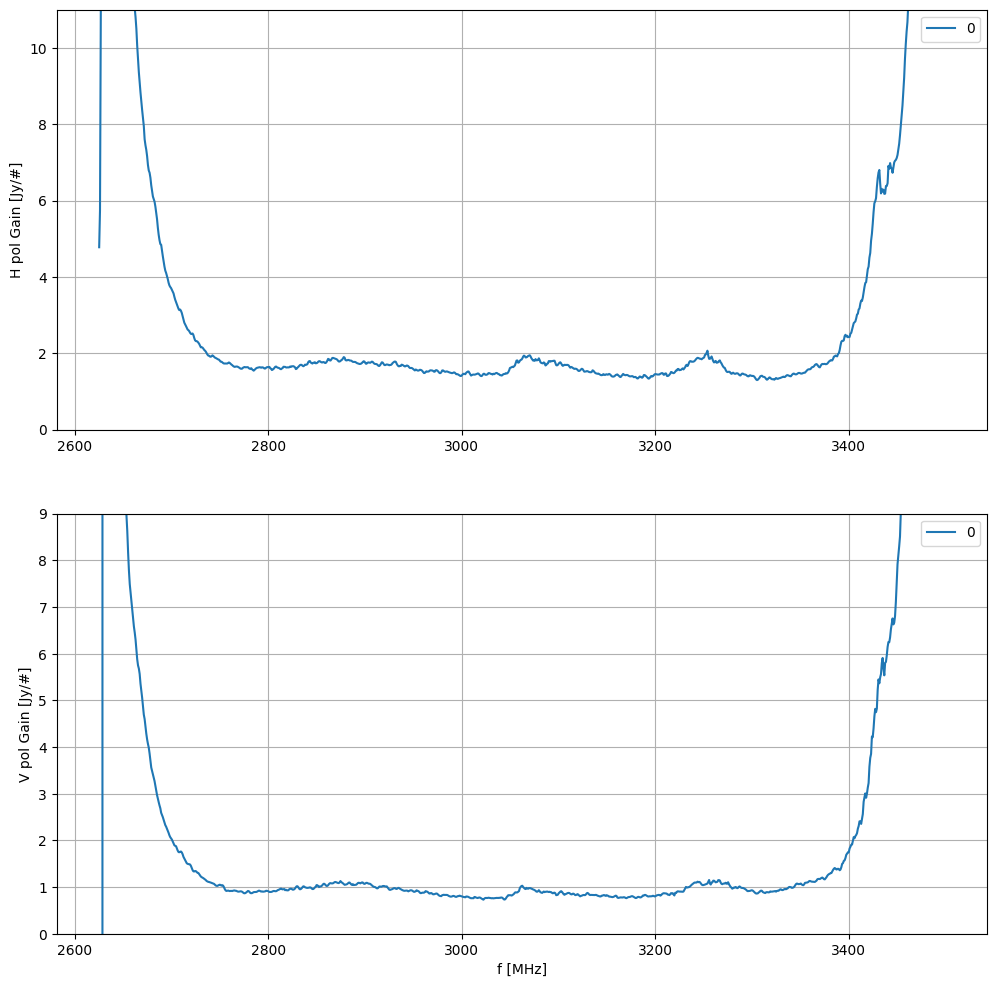

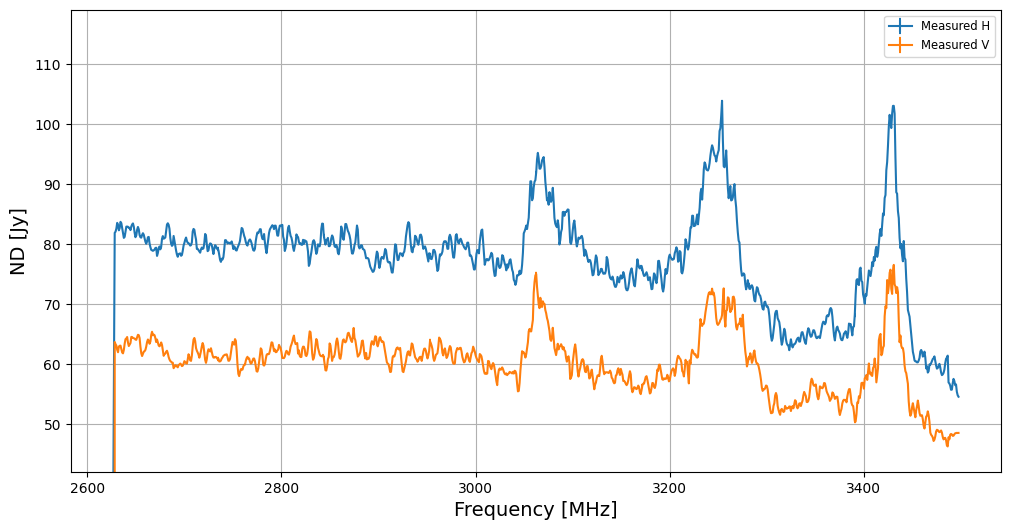

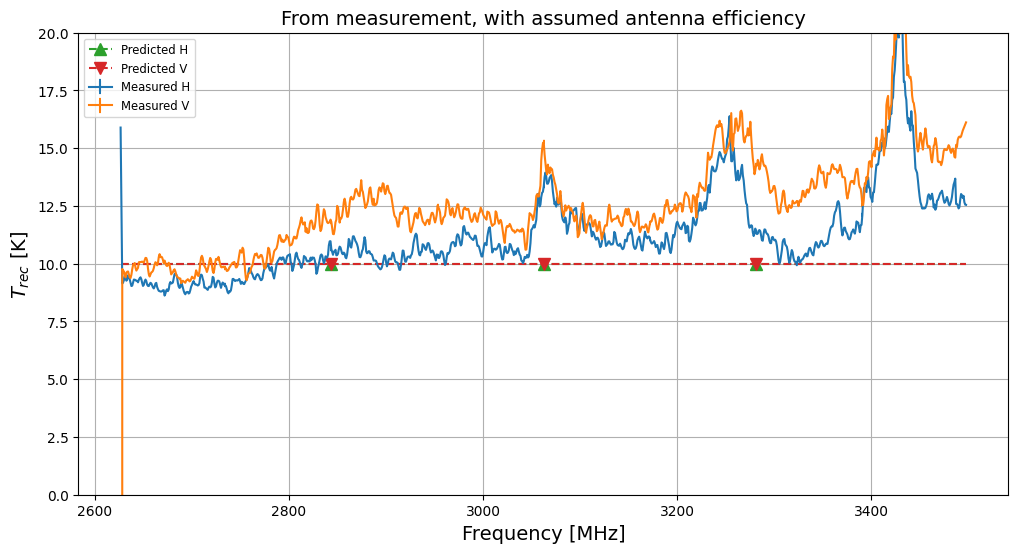

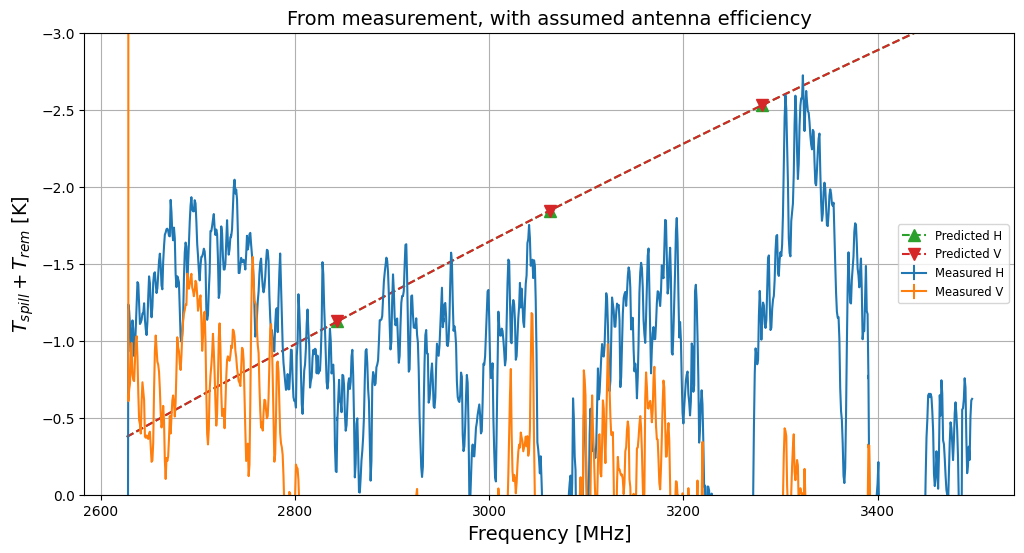

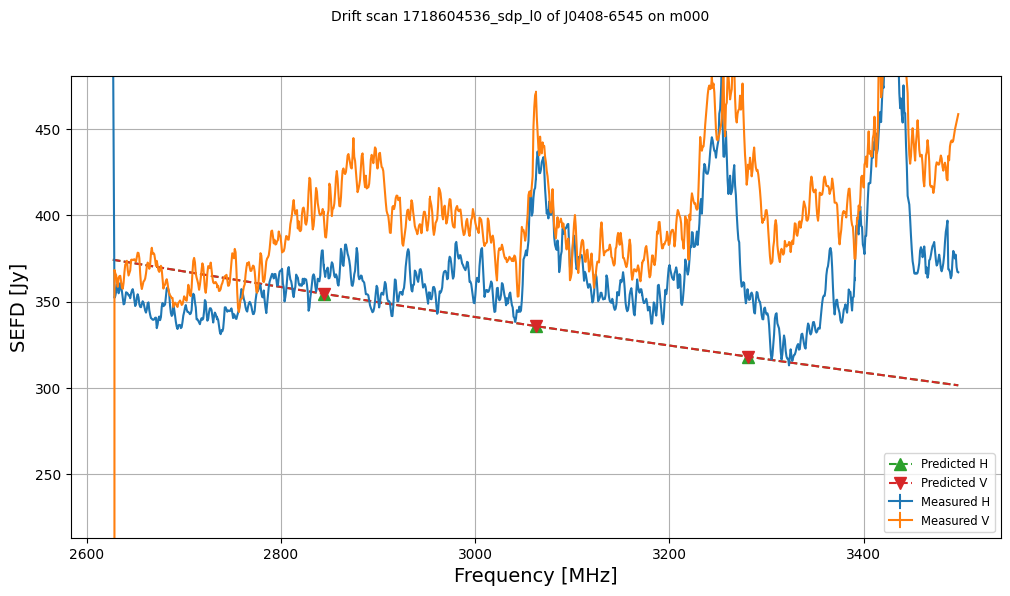

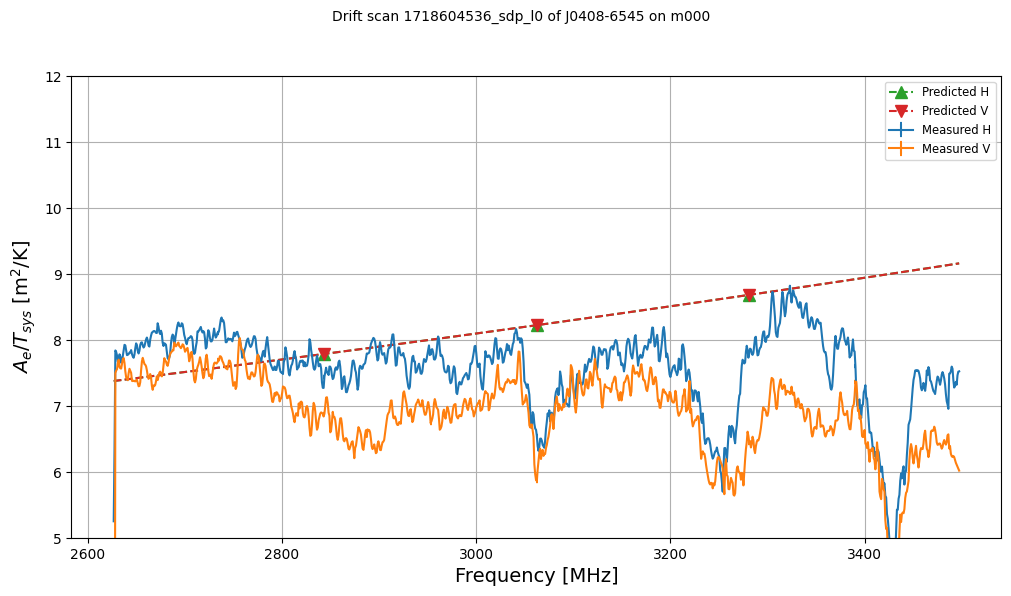

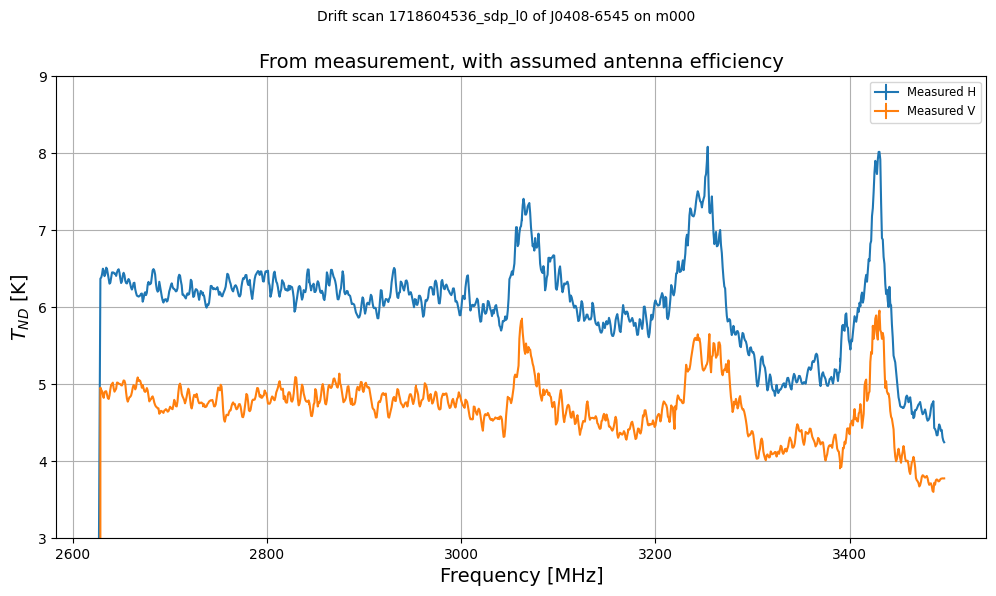

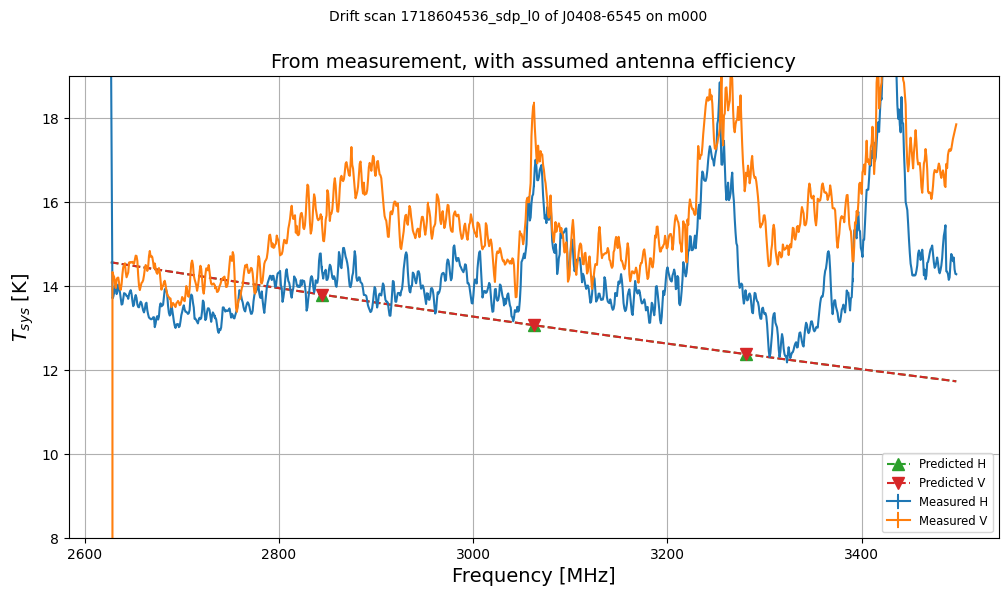

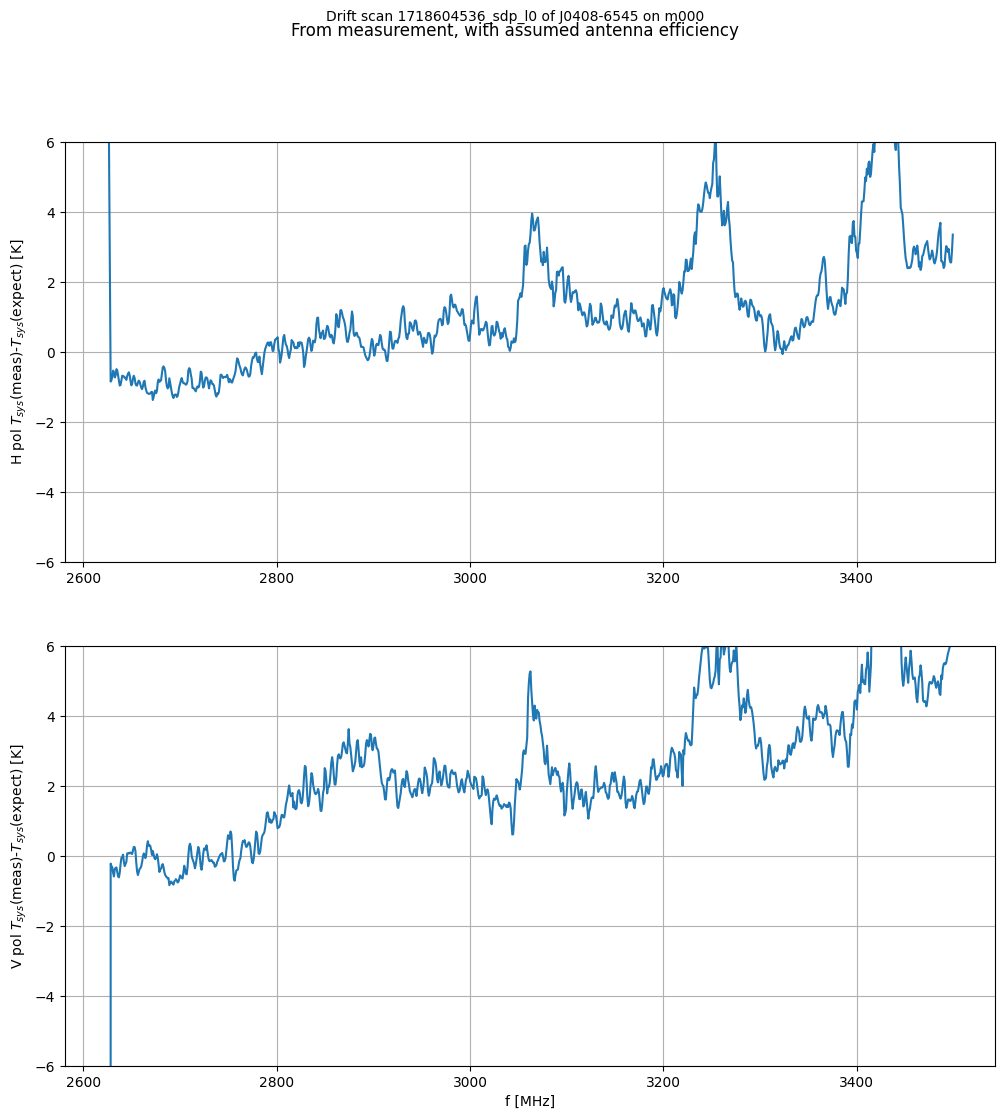

In [9]:
cbid = 1718604536 # PKS0408-65, S4 band

driftscan.analyse(cbid2url(cbid), ant="m000", flux_key=None, debug_nulls=2, makepdf=True);

### Second example - step by step

Name: 1719214722_sdp_l0 (version 4.0)
-------------------------------------------------------------------------------
URL: http://archive-gw-1.kat.ac.za/1719214722/1719214722_sdp_l0.full.rdb
Observer: Mattieu  Experiment ID: 20240624-0006
Description: '4: Drift scan 2'
Observed from 2024-06-24 09:38:44.728 SAST to 2024-06-24 10:31:32.329 SAST
Dump rate / period: 0.99981 Hz / 1.000 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m000,m001,m002,m003,m004,m005,m006,m007,m008,m009,m010,m011,m012,m013,m014,m015,m016,m017,m018,m019,m020,m021,m022,m023,m024,m025,m026,m027,m028,m029,m030,m031,m032,m033,m034,m035,m036,m037,m038,m039,m040,m041,m043,m044,m045,m046,m047,m048,m049,m050,m051,m052,m053,m054,m055,m056,m057,m058,m059,m060,m062,m063  124      7812
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    c856M1k    1284.000         856.000           1024       835.938
-----------------------------------

/home/aph/venv-py3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/aph/work_dvs/dvs/dvs/driftscan.py:218: RuntimeWarning: All-NaN slice encountered
  ax[1][p].plot(chans, 10*np.log10(np.nanmax(vis[:,:,p], axis=0)))


Source:	 J0408-6545
INFO: defaulting to the first of the following flux models: SARAO
	 Gaussian-shaped extent 0.0 arcmin; flux model as per [SARAO].


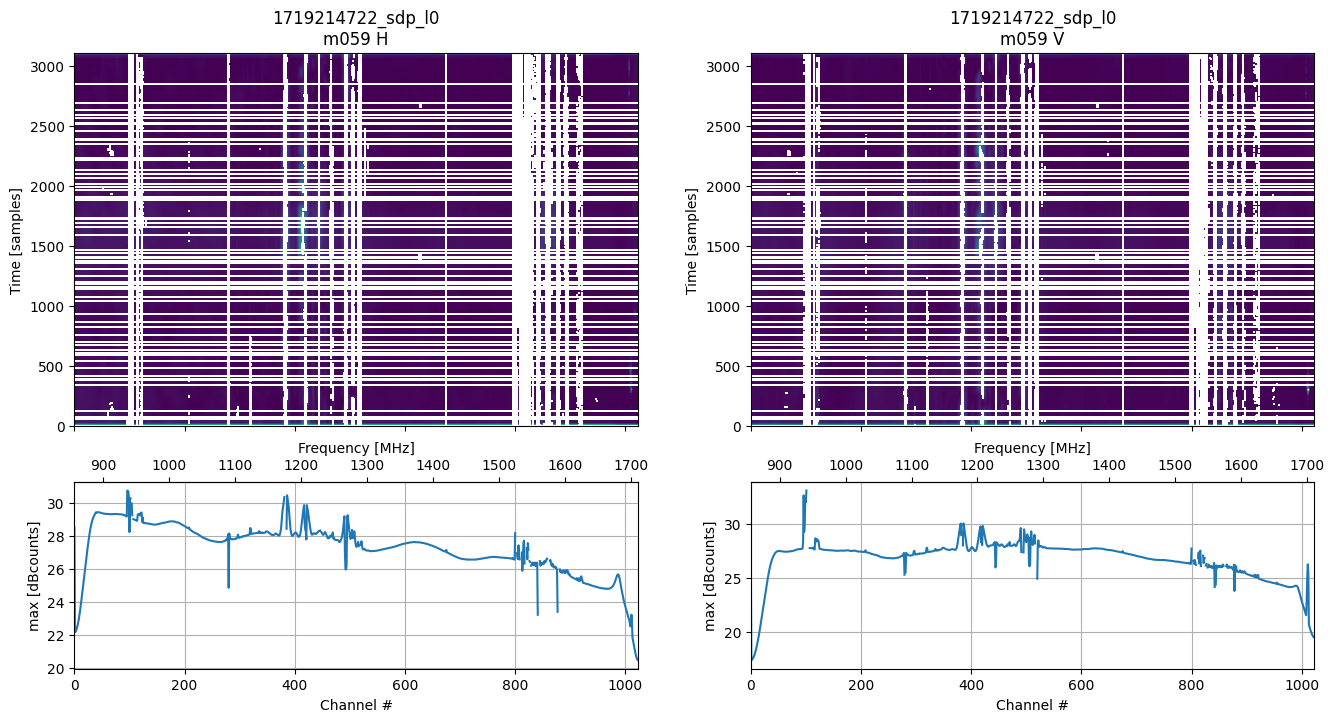

In [12]:
cbid = 1719214722 # PKS0408-65, L band

ds, tgt = driftscan.load_vis(cbid2url(cbid), ant="m059", flags="data_lost,ingest_rfi", debug=True)
src, hpw_src, profile_src, S_src = driftscan.models.describe_source(tgt.name, verbose=True)

INFO: Fitting transit & beam widths from the data itself.


/home/aph/venv-py3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


INFO: Fitting channel 0 of 53
INFO: Fitting channel 10 of 53
INFO: Fitting channel 20 of 53
INFO: Fitting channel 30 of 53
INFO: Fitting channel 40 of 53
INFO: Fitting channel 50 of 53
Fitting HPBW over 864 - 1684 MHz assuming D=13.50 m
Simultaneous fit to 2 products: 1.01225 lambda^1 / 13.5
Simultaneous fit to 2 products: 0.656325 lambda^(0.688166) / 13.5
Transit found at relative time sample 1590; averaging 6 time samples at each datum.


/home/aph/venv-py3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


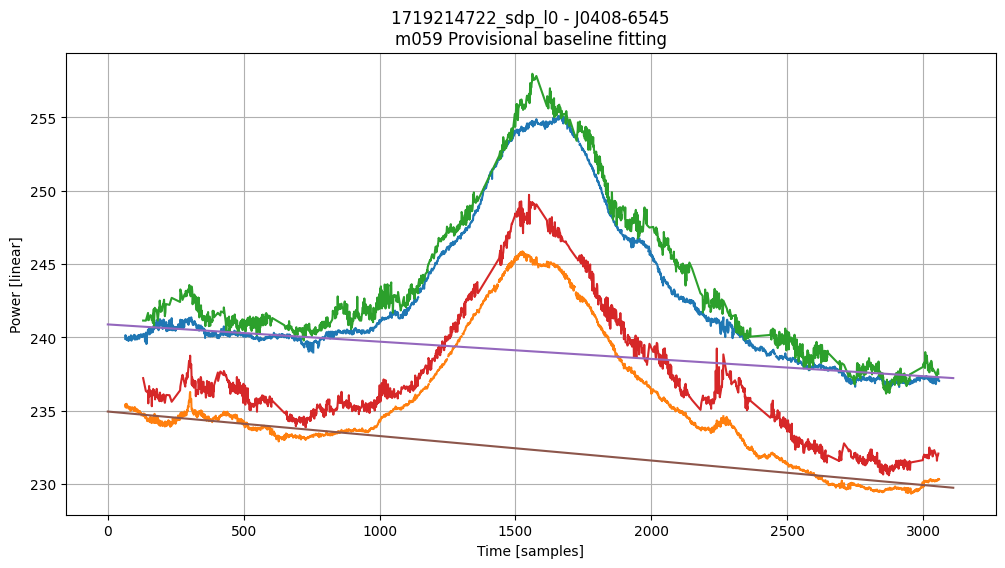

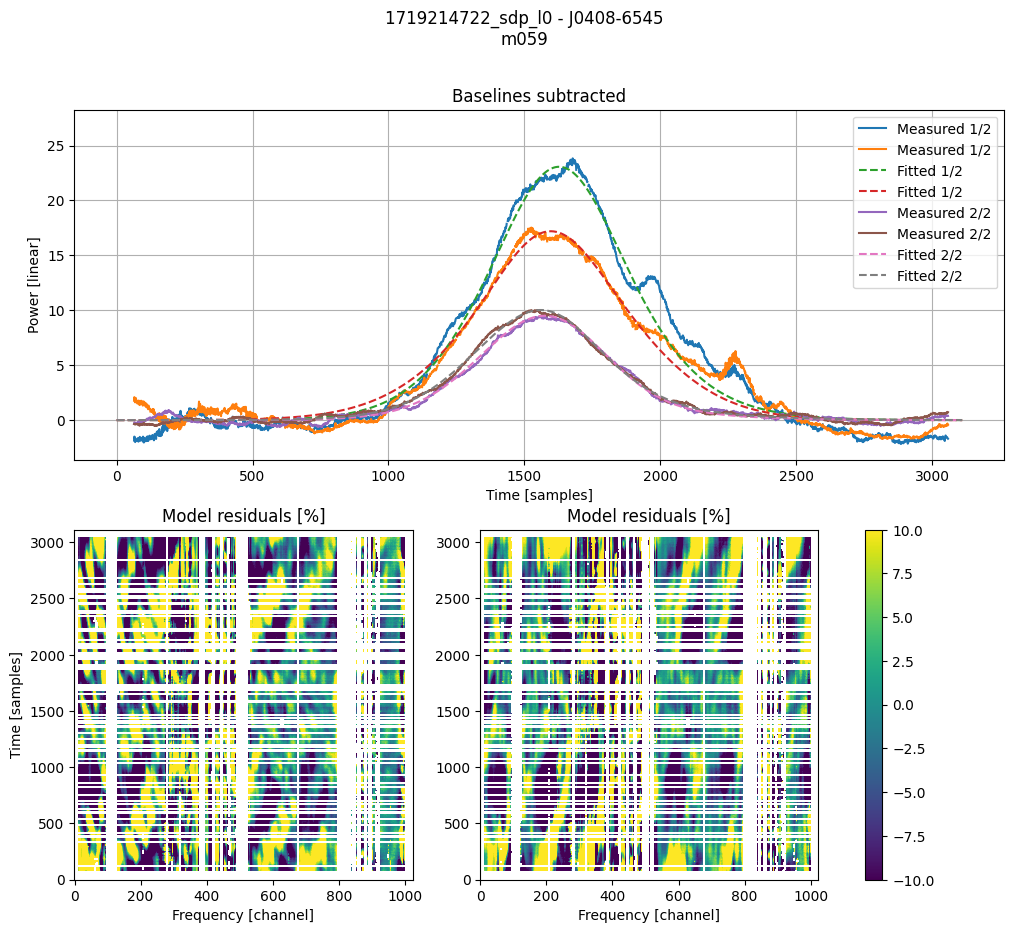

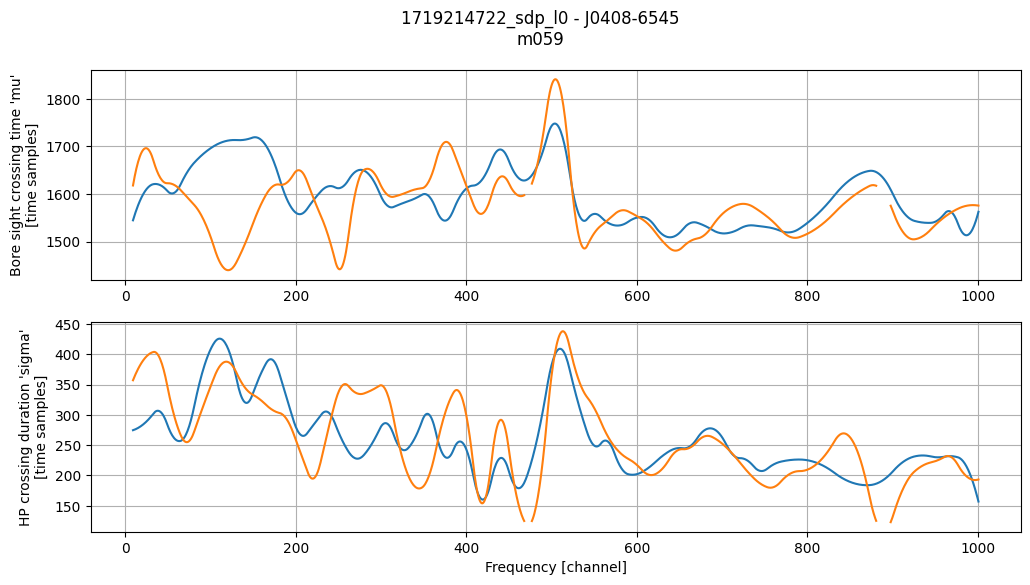

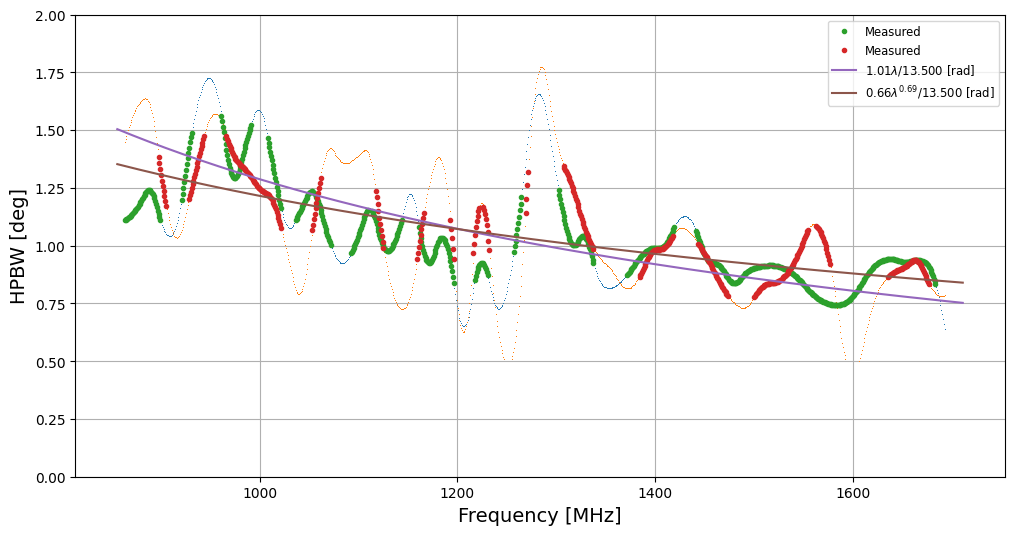

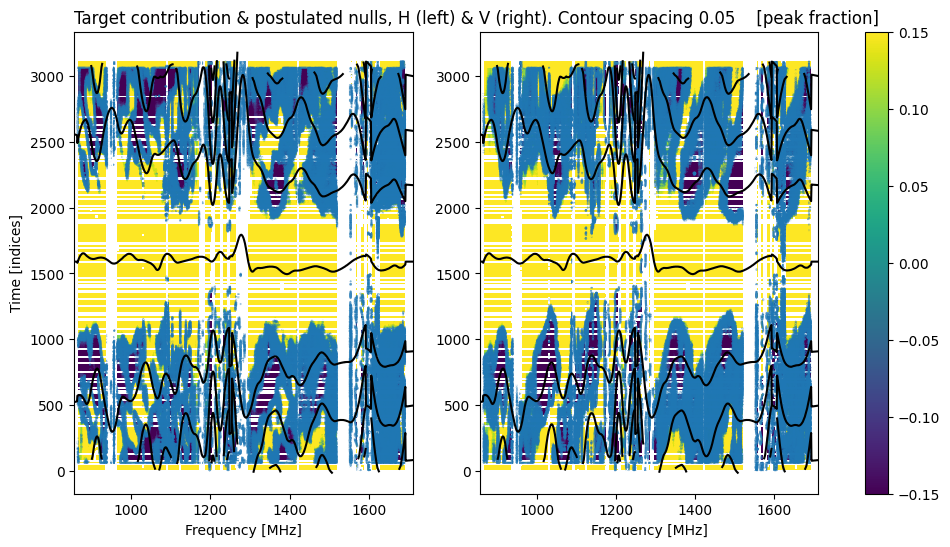

In [13]:
bore, null_l, null_r, _HPBW, null_w = driftscan.find_nulls(ds, hpw_src=hpw_src, debug_level=1)

In [ ]:
# The fits above are very noisy... not worth continuing with the analysis?
_bore_ = int(np.median(bore))

offbore_deg = driftscan.target_offset(tgt, ds.timestamps[_bore_], ds.az[_bore_], ds.el[_bore_], np.mean(ds.freqs))
hpbw0 = np.nanmedian(_HPBW); hpbwf0 = np.median(ds.channel_freqs[np.abs(_HPBW/hpbw0-1)<0.01])
offbore0 = offbore_deg*np.pi/180/hpbw0
wc_scale = driftscan.models.G_bore(offbore0, hpbwf0, np.max(ds.channel_freqs))
if (wc_scale < 0.99):
    print("CAUTION: source transits far from bore sight, scaling flux by up to %.1f%%"%(100*(1-wc_scale)))

par_angle = ds.parangle[_bore_] * np.pi/180
Sobs_src = lambda f_GHz,yr: S_src(f_GHz,yr,par_angle) * driftscan.models.G_bore(offbore0, hpbwf0/1e9, np.reshape(f_GHz, (-1,1)))

In [ ]:
# Use the two nulls immediately adjacent to bore sight (the default "first left & right")
freqs, counts2Jy, SEFD_meas, SEFD_pred, Tsys_meas, Trx_deduced, Tspill_deduced, pTsys, pTrx, pTspill, S_ND, T_ND, el_deg = \
        driftscan.get_SEFD_ND(ds,bore,[null_l[0],null_r[0]],null_w,
                              Sobs_src,hpw_src/_HPBW,profile_src,
                              freqmask=[(360e6,380e6),(924e6,960e6),(1084e6,1088e6)]) # Blank out MUOS, GSM & SSR